In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('tiktok_dataset.csv')

In [4]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Let's start from cleaning the data:

a.Remove the columns which can't have any effect on claim status like video_id

In [5]:
df = df.drop(columns=['video_id','#'])

In [6]:
df.head()

,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


b.Check and work with na rows

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   claim_status              19084 non-null  object 
 1   video_duration_sec        19382 non-null  int64  
 2   video_transcription_text  19084 non-null  object 
 3   verified_status           19382 non-null  object 
 4   author_ban_status         19382 non-null  object 
 5   video_view_count          19084 non-null  float64
 6   video_like_count          19084 non-null  float64
 7   video_share_count         19084 non-null  float64
 8   video_download_count      19084 non-null  float64
 9   video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [8]:
df = df.dropna()

In [9]:
df.value_counts('video_transcription_text').head(10)

video_transcription_text
i learned  from the media a claim that the highest total mileage clocked by a single car is 2850000 million miles    2
i learned  from the media that bubble wrap was originally designed to be used as wallpaper                           2
a colleague read  in the media that insects are attracted to light because of the moon                               2
i read  in the media that jobs in the field of agriculture are the most prevalent types of jobs in the world         2
i read  in the media that the eye of an ostrich is bigger than its brain                                             2
a colleague read  in the media that the oldest surviving song is around 3,500 years old                              2
a colleague read  in the media a claim that some trees in melbourne have email addresses                             2
a colleague learned  from the media a claim that sputnik was the first artificial satellite in space                 2
a friend read  in the m

We will try to find out the most common words in the transcription text w.r.t claim status 

In [10]:
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amrit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stop_words = set(stopwords.words('english'))

In [13]:
def preprocess(text):
    if pd.isna(text):
        return []
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = [w for w in text.split() if w not in stop_words]
    return words

We will now apply the preprocess function to the 'video_transcription_text' column to identify the most common words used in the transcriptions w.r.t claim status

In [14]:
df['tokens'] = df['video_transcription_text'].apply(preprocess)
# Group by claim_status and combine tokens
grouped = df.groupby('claim_status')['tokens'].sum().reset_index()

def get_top_words(words, n=10):
    counter = Counter(words)
    return counter.most_common(n)

grouped['top_10_words'] = grouped['tokens'].apply(lambda x: get_top_words(x, 10))

# Keep only relevant columns
result = grouped[['claim_status', 'top_10_words']]

In [15]:
result

,claim_status,top_10_words
0,claim,"[(claim, 3501), (read, 3302), (learned, 2950),..."
1,opinion,"[(friends, 2179), (colleagues, 1958), (familys..."


In [16]:
# Extract top words for claim
claim_words = set([word for word, count in result.loc[result['claim_status'] == 'claim', 'top_10_words'].iloc[0]])

# Extract top words for opinion
opinion_words = set([word for word, count in result.loc[result['claim_status'] == 'opinion', 'top_10_words'].iloc[0]])

print("Claim words:", claim_words)
print("Opinion words:", opinion_words)

Claim words: {'media', 'news', 'learned', 'someone', 'colleague', 'read', 'friend', 'internet', 'discovered', 'claim'}
Opinion words: {'earth', 'familys', 'world', 'view', 'family', 'opinion', 'say', 'friends', 'willing', 'colleagues'}


In [ ]:
def classify_text(text, claim_words, opinion_words):
    #1.Handle Missing or Invalid Input. If a cell contains a missing (NaN) or non-text value, it returns zeros and an 'Unknown' label.
    if not isinstance(text, str):
        return pd.Series([0, 0, 'Unknown'])
    #2.Preprocess the Text. The function converts the text to lowercase, removes non-alphabetic characters, and splits it into words.
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    #3.Count Word Occurrences. It counts how many words from the text are present in the claim_words and opinion_words sets.
    claim_count = sum(word in claim_words for word in words)
    opinion_count = sum(word in opinion_words for word in words)
    #4.Assign a Label. Based on the counts, it assigns a label: 'C' for claim, 'O' for opinion, or 'Unknown' if counts are equal.
    if claim_count > opinion_count:
        label = 'C'
    elif opinion_count > claim_count:
        label = 'O'
    else:
        label = 'Unknown'
    #5.Return the Results. The function returns a pandas Series containing the claim count, opinion count, and assigned label.
    return pd.Series([claim_count, opinion_count, label])

In [18]:
df[['claim_count', 'opinion_count', 'label']] = df['video_transcription_text'].apply(
    lambda x: classify_text(x, claim_words, opinion_words)
)

In [19]:
df.head()

,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,tokens,claim_count,opinion_count,label
0,claim,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,"[someone, shared, drone, deliveries, already, ...",1,0,C
1,claim,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,"[someone, shared, microorganisms, one, teaspoo...",1,0,C
2,claim,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,"[someone, shared, american, industrialist, and...",1,0,C
3,claim,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,"[someone, shared, metro, st, petersburg, avera...",1,1,Unknown
4,claim,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,"[someone, shared, number, businesses, allowing...",1,0,C


In [20]:
df.drop(columns=['video_transcription_text','tokens','claim_count','opinion_count'], inplace=True)

In [21]:
df.head()

,claim_status,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,label
0,claim,59,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,C
1,claim,32,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,C
2,claim,31,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,C
3,claim,25,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,Unknown
4,claim,19,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,C


In [22]:
# One-hot encode the 'label' column
final_df = pd.get_dummies(df, columns=['verified_status','author_ban_status','label'], dtype=int)

In [23]:
final_df.head()

,claim_status,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,verified_status_not verified,verified_status_verified,author_ban_status_active,author_ban_status_banned,author_ban_status_under review,label_C,label_O,label_Unknown
0,claim,59,343296.0,19425.0,241.0,1.0,0.0,1,0,0,0,1,1,0,0
1,claim,32,140877.0,77355.0,19034.0,1161.0,684.0,1,0,1,0,0,1,0,0
2,claim,31,902185.0,97690.0,2858.0,833.0,329.0,1,0,1,0,0,1,0,0
3,claim,25,437506.0,239954.0,34812.0,1234.0,584.0,1,0,1,0,0,0,0,1
4,claim,19,56167.0,34987.0,4110.0,547.0,152.0,1,0,1,0,0,1,0,0


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
cols_to_scale = ['video_view_count', 'video_like_count','video_share_count','video_download_count','video_comment_count']

In [26]:
scaler = StandardScaler()
final_df[cols_to_scale] = scaler.fit_transform(final_df[cols_to_scale])

In [27]:
final_df['video_duration_minutes'] = final_df['video_duration_sec'] / 60

In [28]:
final_df.drop(columns=['video_duration_sec'], inplace=True)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier,RandomForestClassifier

In [30]:
final_df.columns

Index(['claim_status', 'video_view_count', 'video_like_count',
       'video_share_count', 'video_download_count', 'video_comment_count',
       'verified_status_not verified', 'verified_status_verified',
       'author_ban_status_active', 'author_ban_status_banned',
       'author_ban_status_under review', 'label_C', 'label_O', 'label_Unknown',
       'video_duration_minutes'],
      dtype='object')

In [31]:
X = final_df[['video_view_count', 'video_like_count',
       'video_share_count', 'video_download_count', 'video_comment_count',
       'verified_status_not verified', 'verified_status_verified',
       'author_ban_status_active', 'author_ban_status_banned',
       'author_ban_status_under review', 'label_C', 'label_O', 'label_Unknown',
       'video_duration_minutes']]
y = final_df['claim_status']  # Example target variable

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [33]:
# Base learners
base_learners = [
    ('lr', LogisticRegression(max_iter=2300)),
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True))
]

In [34]:
meta_model = RandomForestClassifier(n_estimators=300)

In [35]:
stacking = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

In [36]:
from sklearn.pipeline import make_pipeline

In [37]:
# pipe = make_pipeline(StandardScaler(),stacking)

In [38]:
stacking.fit(X_train,y_train)

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=2300)),
                               ('dt', DecisionTreeClassifier()),
                               ('svm', SVC(probability=True))],
                   final_estimator=RandomForestClassifier(n_estimators=300))

In [40]:
# 4. Make predictions on the test set to get y_pred
y_pred = stacking.predict(X_test)


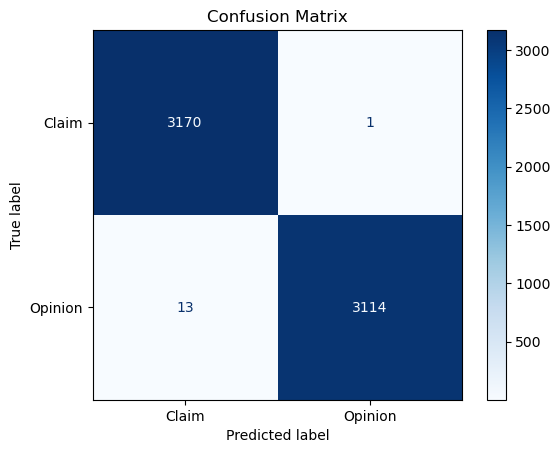

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display as a heatmap-style matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Claim', 'Opinion'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [49]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9978


In [50]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['Claim', 'Opinion'])
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

       Claim       1.00      1.00      1.00      3171
     Opinion       1.00      1.00      1.00      3127

    accuracy                           1.00      6298
   macro avg       1.00      1.00      1.00      6298
weighted avg       1.00      1.00      1.00      6298



In [51]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross validation on the stacking model
scores = cross_val_score(stacking, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Cross-Validation Scores: [0.99659418 0.99004454 0.99869007 0.99921404 0.99868973]
Mean Accuracy: 0.9966
Standard Deviation: 0.0034
